In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

train_df = pd.read_csv('econet dataset/train.csv')
unique_locations = train_df['Station'].unique()
print("The locations in the training dataset are: ", unique_locations)
print("\nCount: ", len(unique_locations))
print(train_df.shape)

The locations in the training dataset are:  ['AURO' 'BAHA' 'BALD' 'BEAR' 'BUCK' 'BURN' 'CAST' 'CHAP' 'CLA2' 'CLAY'
 'CLIN' 'DURH' 'FLET' 'FRYI' 'GOLD' 'HAML' 'JACK' 'JEFF' 'KINS' 'LAKE'
 'LAUR' 'LEWS' 'LILE' 'MITC' 'NCAT' 'NEWL' 'OXFO' 'PLYM' 'REED' 'REID'
 'ROCK' 'SALI' 'SASS' 'SILR' 'SPIN' 'SPRU' 'TAYL' 'UNCA' 'WAYN' 'WHIT'
 'WILD' 'WILL' 'WINE']

Count:  43
(6593274, 9)


In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6593274 entries, 0 to 6593273
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Station  object 
 1   Ob       object 
 2   value    float64
 3   measure  object 
 4   target   bool   
 5   R_flag   int64  
 6   I_flag   int64  
 7   Z_flag   int64  
 8   B_flag   int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 408.7+ MB


In [3]:
train_df['Ob'] = pd.to_datetime(train_df['Ob'])

In [4]:
print(train_df.head(5))

  Station                  Ob  value   measure  target  R_flag  I_flag  \
0    AURO 2021-01-02 00:30:00   19.2  temp_wxt   False       2      -1   
1    AURO 2021-01-02 04:30:00   19.8  temp_wxt   False       2      -1   
2    AURO 2021-01-02 05:30:00   19.5  temp_wxt   False       2      -1   
3    AURO 2021-01-02 07:30:00   18.5  temp_wxt   False       2      -1   
4    AURO 2021-02-16 02:30:00   17.7  temp_wxt   False       2      -1   

   Z_flag  B_flag  
0       0       1  
1       0       1  
2       0       1  
3       0       1  
4       0       1  


In [5]:
temp_df = train_df.loc[train_df['Station'] == 'AURO']

In [6]:
temp_df['month'] = pd.DatetimeIndex(temp_df['Ob']).month

<AxesSubplot:xlabel='month', ylabel='value'>

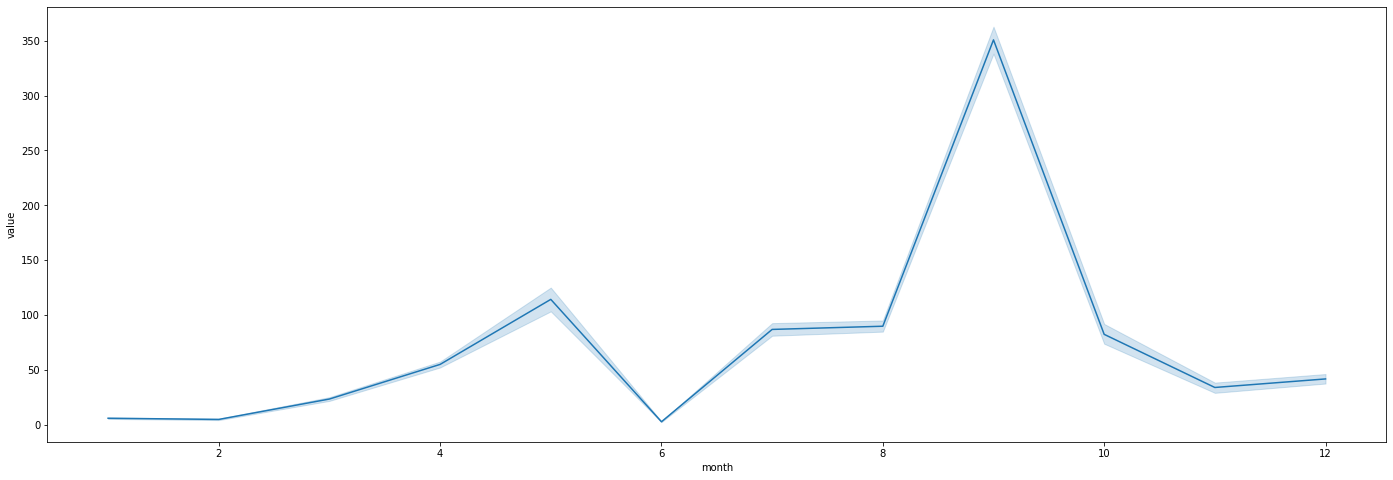

In [7]:
plt.figure(figsize=(24,8))
sns.lineplot(temp_df['month'], temp_df['value'])

<AxesSubplot:xlabel='Ob', ylabel='target'>

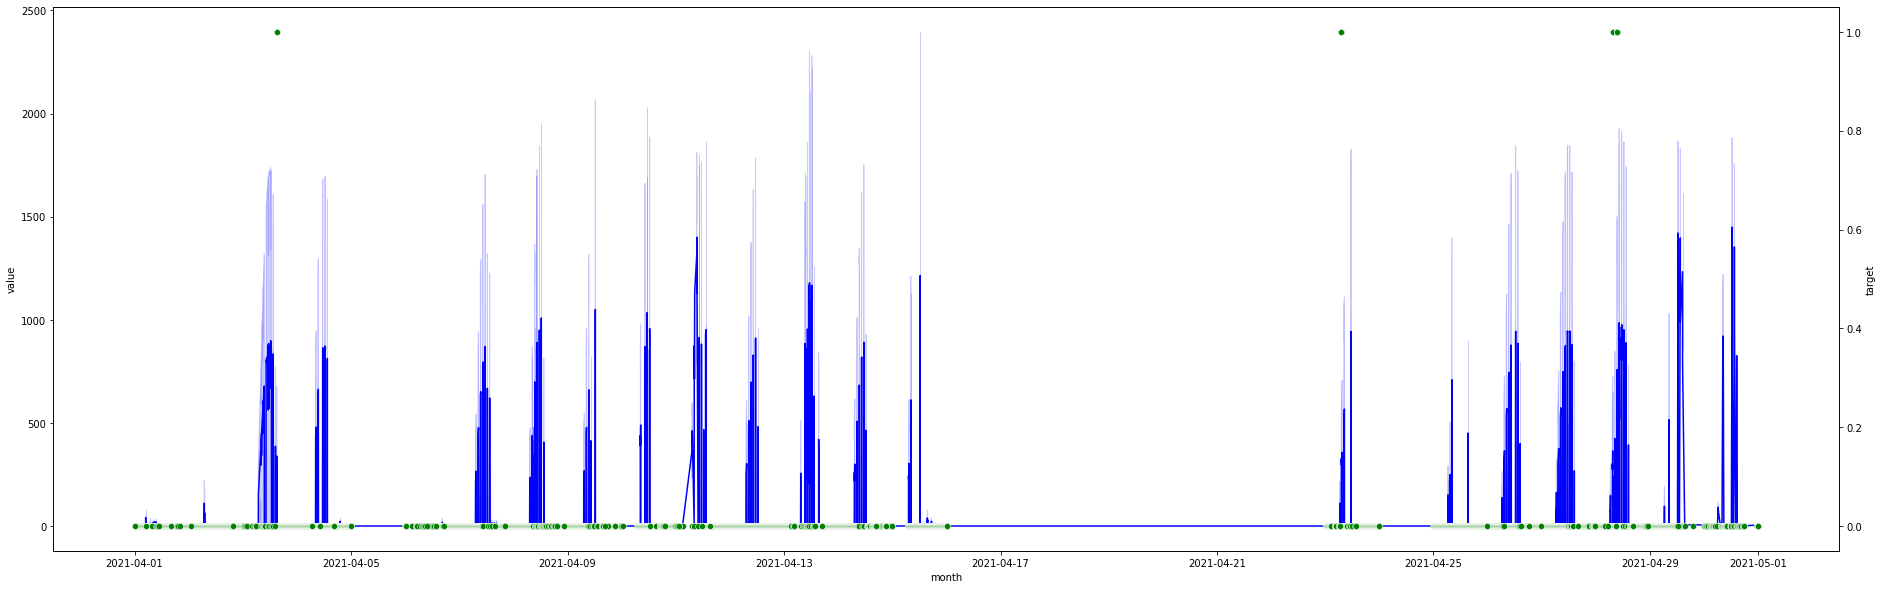

In [8]:
import seaborn as sns
plt.figure(figsize=(32,10))
plt.xlabel('month')
plt.ylabel('value')

#Change the location if you want to check for other locations.
temp_df = train_df.loc[train_df['Station'] == 'AURO']
temp_df['month'] = pd.DatetimeIndex(temp_df['Ob']).month

#Change the value of the month if you want to see for different months.
df = temp_df.loc[temp_df['month'] == 4]
sns.lineplot(df['Ob'], df['value'], color='b')
ax2 = plt.twinx()
sns.scatterplot(df['Ob'], df['target'], color="g", ax=ax2)

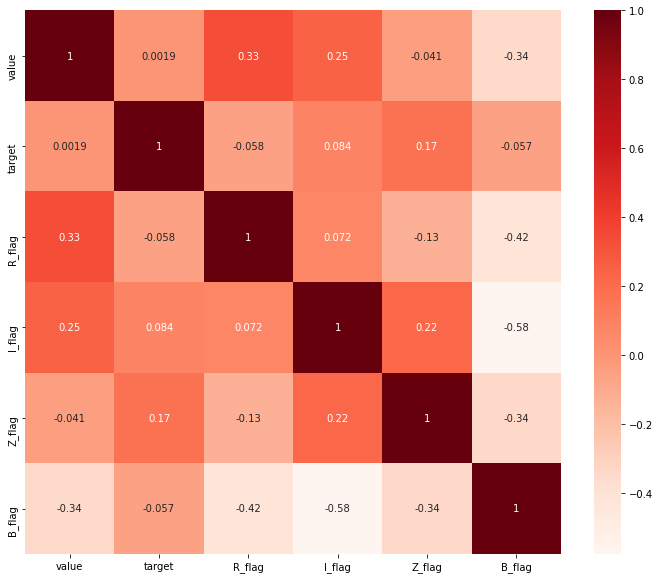

In [9]:
plt.figure(figsize=(12,10))
cor = train_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## As you can see from the above heatmap, the correlation between the values and the target variable is very low with the highest being 0.17 between Z_flag and target

In [10]:
print(train_df.columns)

Index(['Station', 'Ob', 'value', 'measure', 'target', 'R_flag', 'I_flag',
       'Z_flag', 'B_flag'],
      dtype='object')


In [82]:
from sklearn.preprocessing import StandardScaler

features = ['Station', 'Ob', 'value', 'measure', 'R_flag', 'I_flag', 'Z_flag', 'B_flag']
temp_df = train_df.loc[:]
temp_df['measure'] = pd.get_dummies(temp_df['measure'])
temp_df['Station'] = pd.get_dummies(temp_df['Station'])
temp_df['Ob'] = temp_df['Ob'].values.astype(float)

x = temp_df.loc[:, features].values
print(x)
y = temp_df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)
print(x)

[[ 1.00000000e+00  1.60954740e+18  1.92000000e+01 ... -1.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  1.60956180e+18  1.98000000e+01 ... -1.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  1.60956540e+18  1.95000000e+01 ... -1.00000000e+00
   0.00000000e+00  1.00000000e+00]
 ...
 [ 0.00000000e+00  1.61743128e+18 -5.12300000e+00 ... -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00]
 [ 0.00000000e+00  1.61743134e+18 -5.09000000e+00 ... -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00]
 [ 0.00000000e+00  1.61743140e+18 -4.95800000e+00 ... -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00]]
[[ 5.7685095  -1.61911835 -0.25145997 ... -0.40013929  1.23398172
   0.43169473]
 [ 5.7685095  -1.6174877  -0.24933667 ... -0.40013929  1.23398172
   0.43169473]
 [ 5.7685095  -1.61708004 -0.25039832 ... -0.40013929  1.23398172
   0.43169473]
 ...
 [-0.17335501 -0.72635072 -0.33753475 ... -0.40013929 -0.34186828
  -1.45115705]
 [-0.17335501 -0.72634393 -0.337417

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
principalComponents = pca.fit_transform(x)
p_df = pd.DataFrame(principalComponents)

In [84]:
p_df.head()

,0,1,2,3,4,5,6
0,-0.255471,1.090409,3.832890,-4.080209,2.015099,1.467285,-0.162201
1,-0.254435,1.090398,3.831178,-4.080589,2.015900,1.467671,-0.160724
2,-0.254828,1.090058,3.831330,-4.080208,2.016399,1.467469,-0.161475
3,-0.256194,1.089078,3.832148,-4.079022,2.017663,1.466800,-0.163973
4,-0.212576,0.964553,3.580790,-4.009620,2.340634,1.463034,-0.170460


In [85]:
finalDf = pd.concat([p_df, temp_df[['target']]], axis = 1)
print(finalDf.head())

          0         1         2         3         4         5         6  \
0 -0.255471  1.090409  3.832890 -4.080209  2.015099  1.467285 -0.162201   
1 -0.254435  1.090398  3.831178 -4.080589  2.015900  1.467671 -0.160724   
2 -0.254828  1.090058  3.831330 -4.080208  2.016399  1.467469 -0.161475   
3 -0.256194  1.089078  3.832148 -4.079022  2.017663  1.466800 -0.163973   
4 -0.212576  0.964553  3.580790 -4.009620  2.340634  1.463034 -0.170460   

   target  
0   False  
1   False  
2   False  
3   False  
4   False  


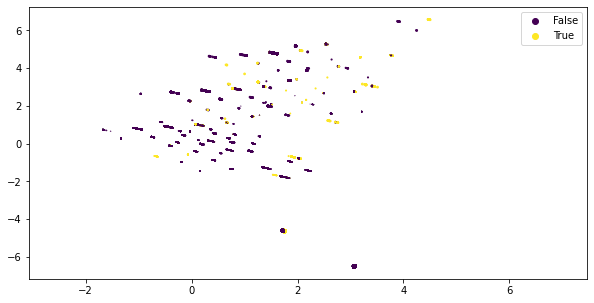

In [17]:
plt.figure(figsize=(10,5))
plot = plt.scatter(principalComponents[:,0], principalComponents[:,1], principalComponents[:,2], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(finalDf['target'].unique()))
plt.show()

In [18]:
finalDf['target'].value_counts()

False    6358102
True      235172
Name: target, dtype: int64

# Implementing a baseline for differently preprocessed data

## Normal data without any preprocessing

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [103]:
label_encoder = LabelEncoder()
train_df['Station'] = label_encoder.fit_transform(train_df['Station'])
train_df['measure'] = label_encoder.fit_transform(train_df['measure'])
train_df['Ob'] = train_df['Ob'].values.astype(float)

In [104]:
y = label_encoder.fit_transform(train_df['target'])
X = train_df[['Station', 'Ob', 'value', 'measure', 'R_flag', 'I_flag',
       'Z_flag', 'B_flag']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

model=RandomForestClassifier(n_estimators=100)
under = RandomUnderSampler(sampling_strategy='not minority')
steps = [('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))
y_preds = pipeline.predict(X_test)
print(classification_report(y_test, y_preds))

0.9641976104439751
RandomForestClassifier()
[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98   1271596
           1       0.00      0.00      0.00     47059

    accuracy                           0.96   1318655
   macro avg       0.48      0.50      0.49   1318655
weighted avg       0.93      0.96      0.95   1318655



In [89]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

model=RandomForestClassifier(n_estimators=50)
over = RandomOverSampler(sampling_strategy='not majority')
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))
y_preds = pipeline.predict(X_test)
print(classification_report(y_test, y_preds))

0.996631416102013
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1271596
           1       0.95      0.95      0.95     47059

    accuracy                           1.00   1318655
   macro avg       0.98      0.97      0.98   1318655
weighted avg       1.00      1.00      1.00   1318655



<AxesSubplot:xlabel='value', ylabel='R_flag'>

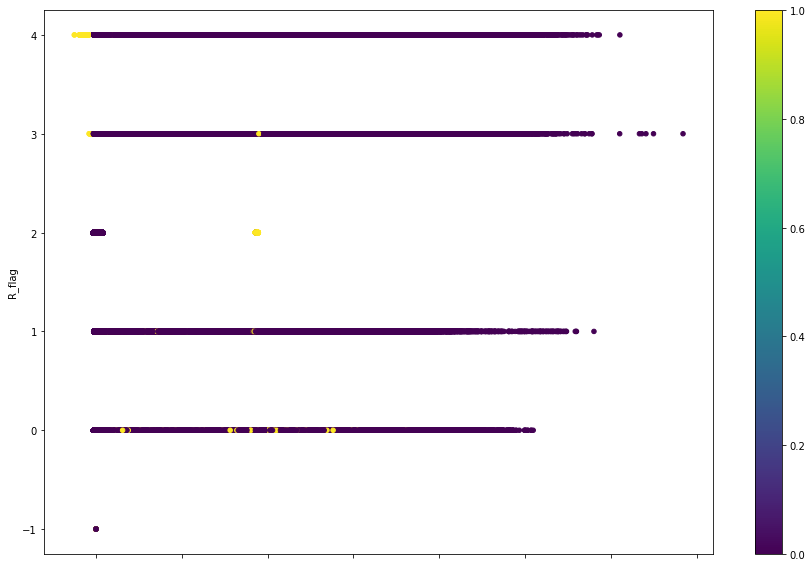

In [60]:
X_train.plot.scatter(x='value', y='measure', c=y_train, colormap='viridis', figsize=(15,10))

<AxesSubplot:xlabel='value', ylabel='R_flag'>

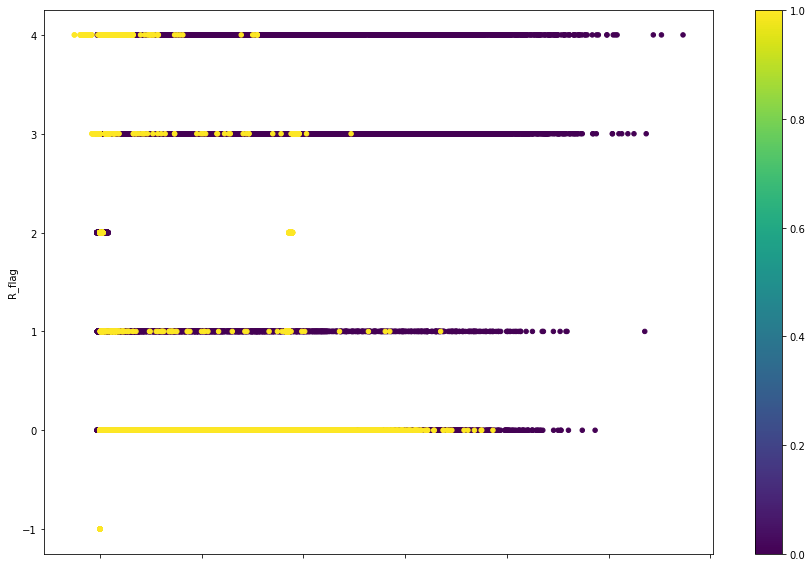

In [66]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(sampling_strategy='not minority')
under_df = under.fit_resample(X_train, y_train)
under_df[0].plot.scatter(x='value', y='R_flag', c=under_df[1], colormap='viridis', figsize=(15,10))

In [67]:
pd.DataFrame(under_df[1]).value_counts()

0    188113
1    188113
dtype: int64

<AxesSubplot:xlabel='value', ylabel='R_flag'>

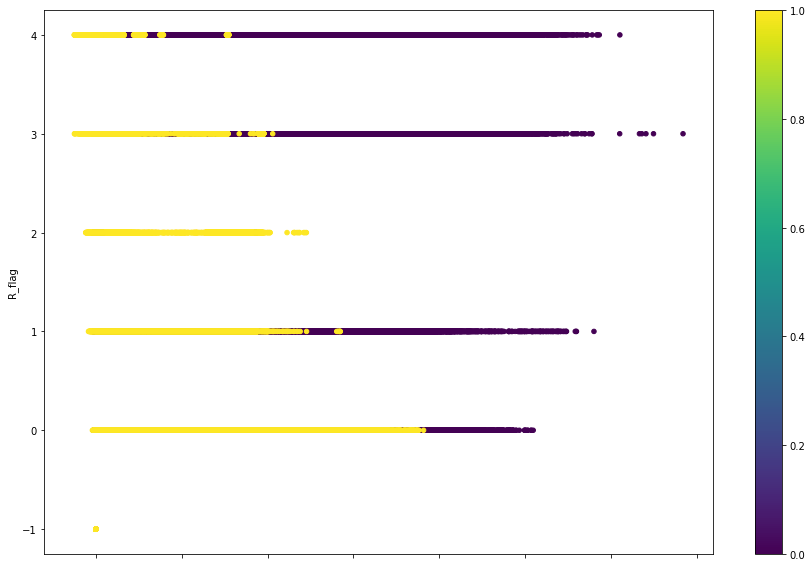

In [68]:
from imblearn.under_sampling import RandomUnderSampler
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='not minority'))
under_df = resample.fit_resample(X_train, y_train)
under_df[0].plot.scatter(x='value', y='R_flag', c=under_df[1], colormap='viridis', figsize=(15,10))

In [69]:
pd.DataFrame(under_df[1]).value_counts()

0    5086506
1    5051639
dtype: int64

In [70]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

model=RandomForestClassifier(criterion='entropy')
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='not minority'))
pipeline=Pipeline(steps=[('r', resample), ('m', model)])
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))
y_preds = pipeline.predict(X_test)
print(classification_report(y_test, y_preds))

0.9991453412757696
RandomForestClassifier(criterion='entropy')
[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1271596
           1       0.98      0.99      0.99     47059

    accuracy                           1.00   1318655
   macro avg       0.99      1.00      0.99   1318655
weighted avg       1.00      1.00      1.00   1318655



<AxesSubplot:xlabel='value', ylabel='R_flag'>

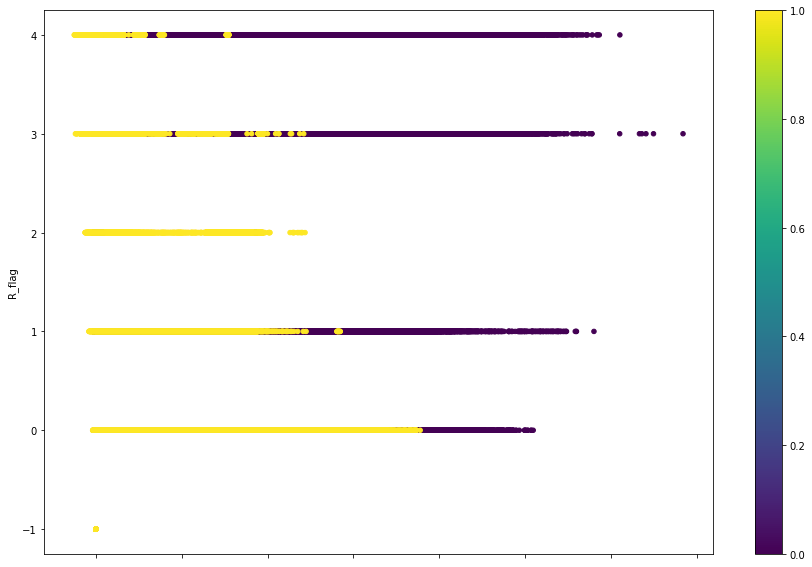

In [73]:
from imblearn.over_sampling import ADASYN 
over = ADASYN (sampling_strategy='auto', random_state=42)
over_df = over.fit_resample(X_train, y_train)
over_df[0].plot.scatter(x='value', y='R_flag', c=over_df[1], colormap='viridis', figsize=(15,10))

In [95]:
pd.DataFrame(over_df[1]).value_counts()

1    5119951
0    5086506
dtype: int64

In [76]:
from imblearn.over_sampling import ADASYN 

model=RandomForestClassifier(n_estimators = 50, criterion='entropy')
over = ADASYN (sampling_strategy='auto', random_state=42)
steps = [('over', over),('model', model)]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))
y_preds = pipeline.predict(X_test)
print(classification_report(y_test, y_preds))

0.99913927448802
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1271596
           1       0.98      0.99      0.99     47059

    accuracy                           1.00   1318655
   macro avg       0.99      1.00      0.99   1318655
weighted avg       1.00      1.00      1.00   1318655



In [99]:
model=RandomForestClassifier(n_estimators=50, criterion='entropy')
over = SMOTE(sampling_strategy='not majority')
under = RandomUnderSampler(sampling_strategy='majority')
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)
X_test = scaler.transform(X_test)
print(pipeline.score(X_test, y_test))
y_preds = pipeline.predict(X_test)
print(classification_report(y_test, y_preds))

0.9991218324732398
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1271596
           1       0.98      0.99      0.99     47059

    accuracy                           1.00   1318655
   macro avg       0.99      1.00      0.99   1318655
weighted avg       1.00      1.00      1.00   1318655



In [105]:
from imblearn.ensemble import BalancedRandomForestClassifier

model=BalancedRandomForestClassifier(n_estimators = 50, criterion='entropy')
steps = [('model', model)]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))
y_preds = pipeline.predict(X_test)
print(classification_report(y_test, y_preds))

0.9959420773439603
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1271596
           1       0.90      1.00      0.95     47059

    accuracy                           1.00   1318655
   macro avg       0.95      1.00      0.97   1318655
weighted avg       1.00      1.00      1.00   1318655



## PCA data

In [110]:
y = label_encoder.fit_transform(finalDf['target'])
X = finalDf[[0, 1, 2, 3, 4, 5, 6]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

model=RandomForestClassifier(n_estimators=100)
under = RandomUnderSampler(sampling_strategy='not minority')
steps = [('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))
y_preds = pipeline.predict(X_test)
print(classification_report(y_test, y_preds))

0.9825215844932905
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1271596
           1       0.67      0.99      0.80     47059

    accuracy                           0.98   1318655
   macro avg       0.84      0.99      0.90   1318655
weighted avg       0.99      0.98      0.98   1318655



In [92]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

model=RandomForestClassifier(n_estimators=50)
over = RandomOverSampler(sampling_strategy='not majority')
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))
y_preds = pipeline.predict(X_test)
print(classification_report(y_test, y_preds))

0.9966473414198559
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1271596
           1       0.96      0.95      0.95     47059

    accuracy                           1.00   1318655
   macro avg       0.98      0.97      0.98   1318655
weighted avg       1.00      1.00      1.00   1318655



In [93]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

model=RandomForestClassifier(n_estimators = 50, criterion='entropy')
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='not minority'))
pipeline=Pipeline(steps=[('r', resample), ('m', model)])
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))
y_preds = pipeline.predict(X_test)
print(classification_report(y_test, y_preds))

0.9941387246853802
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1271596
           1       0.88      0.97      0.92     47059

    accuracy                           0.99   1318655
   macro avg       0.94      0.98      0.96   1318655
weighted avg       0.99      0.99      0.99   1318655



In [94]:
from imblearn.over_sampling import ADASYN 

model=RandomForestClassifier(n_estimators = 50, criterion='entropy')
over = ADASYN (sampling_strategy='auto', random_state=42)
steps = [('over', over),('model', model)]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))
y_preds = pipeline.predict(X_test)
print(classification_report(y_test, y_preds))

0.9903788329775415
              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1271596
           1       0.80      0.98      0.88     47059

    accuracy                           0.99   1318655
   macro avg       0.90      0.98      0.94   1318655
weighted avg       0.99      0.99      0.99   1318655



In [107]:
from imblearn.ensemble import BalancedRandomForestClassifier

model=BalancedRandomForestClassifier(n_estimators = 50, criterion='entropy')
steps = [('model', model)]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))
y_preds = pipeline.predict(X_test)
print(classification_report(y_test, y_preds))

0.9828461576378962
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1271596
           1       0.68      0.99      0.80     47059

    accuracy                           0.98   1318655
   macro avg       0.84      0.99      0.90   1318655
weighted avg       0.99      0.98      0.98   1318655

